# Exploratory data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# We wanna see all columns of a DataFrame
pd.set_option("display.max_columns", None)

## 1. Data load

We load the data, engineer a new win column and extract the relevant data.

In [3]:
data = pd.read_csv('nuggets_2016_17_2022_23_j_m.csv', dtype = {'GAME_ID': 'string'})
data['WIN'] = np.where(data['WL'] == 'W', 1, 0)
columns = ['WIN', 'JOKIC_PTS', 'JOKIC_REB', 'JOKIC_AST', 'MURRAY_PTS', 'MURRAY_REB', 'MURRAY_AST', \
            'REST_PTS', 'REST_REB', 'REST_AST']
data_r1 = data[columns].copy()
data_r1.head(2)

,WIN,JOKIC_PTS,JOKIC_REB,JOKIC_AST,MURRAY_PTS,MURRAY_REB,MURRAY_AST,REST_PTS,REST_REB,REST_AST
0,1,8,3,5,0,3,4,94,38,15
1,0,6,6,0,9,1,2,71,41,13


## 2. Non-graphical analysis

In [4]:
data_r1.describe()

,WIN,JOKIC_PTS,JOKIC_REB,JOKIC_AST,MURRAY_PTS,MURRAY_REB,MURRAY_AST,REST_PTS,REST_REB,REST_AST
count,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000
mean,0.634409,21.887097,10.956989,7.537634,19.432796,4.072581,4.951613,70.677419,29.395161,14.112903
std,0.482244,8.964629,3.949585,3.386382,8.908235,2.173747,2.572469,14.148356,6.140079,4.270900
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,31.000000,14.000000,4.000000
25%,0.000000,16.000000,8.000000,5.000000,14.000000,2.000000,3.000000,61.000000,25.000000,11.000000
50%,1.000000,22.000000,11.000000,7.000000,19.000000,4.000000,5.000000,70.000000,29.000000,14.000000
75%,1.000000,28.000000,13.000000,10.000000,24.000000,5.000000,6.250000,81.000000,33.000000,17.000000
max,1.000000,53.000000,27.000000,18.000000,50.000000,12.000000,15.000000,113.000000,50.000000,32.000000


In [5]:
data_r1.groupby('WIN')[['JOKIC_AST', 'MURRAY_PTS']].describe()

JOKIC_AST                                                MURRAY_PTS  \
        count      mean       std  min  25%  50%   75%   max      count   
WIN                                                                       
0       136.0  6.433824  3.025086  0.0  4.0  6.0   8.0  17.0      136.0   
1       236.0  8.173729  3.425733  0.0  5.0  8.0  10.0  18.0      236.0   

                                                        
          mean       std  min    25%   50%   75%   max  
WIN                                                     
0    17.411765  7.971682  0.0  11.75  17.0  21.0  50.0  
1    20.597458  9.222258  0.0  14.75  20.0  26.0  50.0

## 3. Univariate analysis

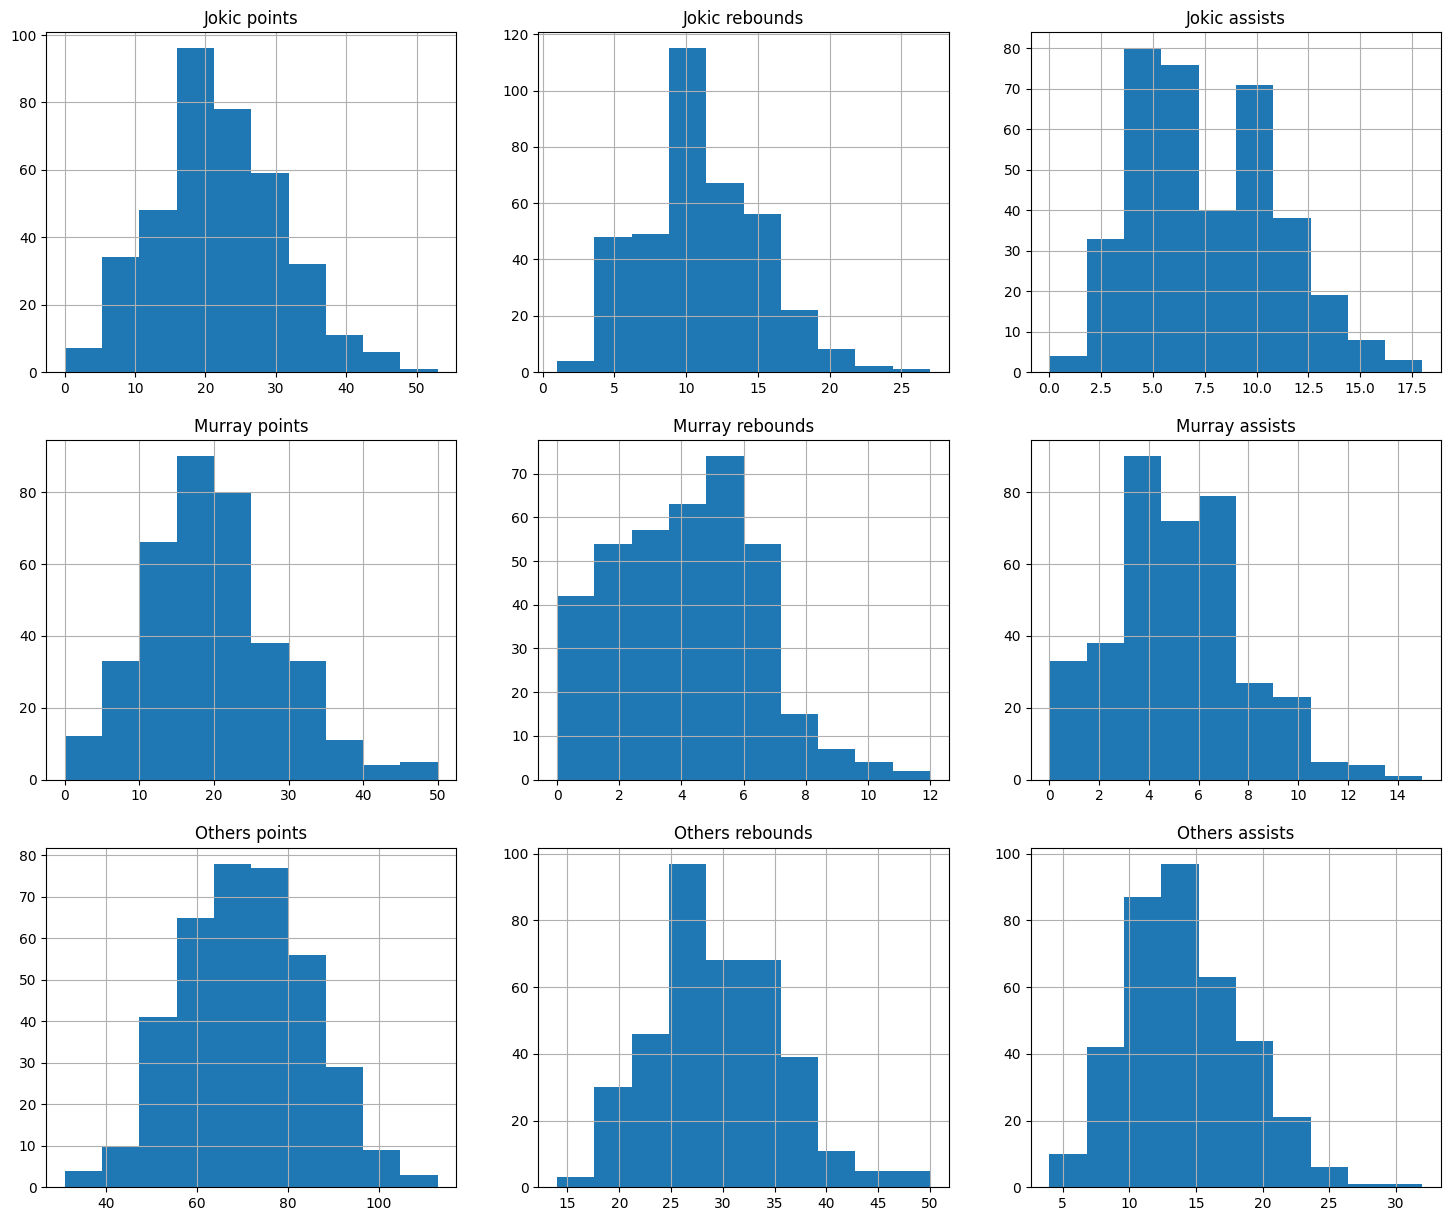

In [6]:
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (18, 15))
data_r1['JOKIC_PTS'].hist(ax = ax[0, 0])
ax[0, 0].set_title('Jokic points')

data_r1['JOKIC_REB'].hist(ax = ax[0, 1])
ax[0, 1].set_title('Jokic rebounds')

data_r1['JOKIC_AST'].hist(ax = ax[0, 2])
ax[0, 2].set_title('Jokic assists')

data_r1['MURRAY_PTS'].hist(ax = ax[1, 0])
ax[1, 0].set_title('Murray points')

data_r1['MURRAY_REB'].hist(ax = ax[1, 1])
ax[1, 1].set_title('Murray rebounds')

data_r1['MURRAY_AST'].hist(ax = ax[1, 2])
ax[1, 2].set_title('Murray assists')

data_r1['REST_PTS'].hist(ax = ax[2, 0])
ax[2, 0].set_title('Others points')

data_r1['REST_REB'].hist(ax = ax[2, 1])
ax[2, 1].set_title('Others rebounds')

data_r1['REST_AST'].hist(ax = ax[2, 2])
ax[2, 2].set_title('Others assists')
plt.show()

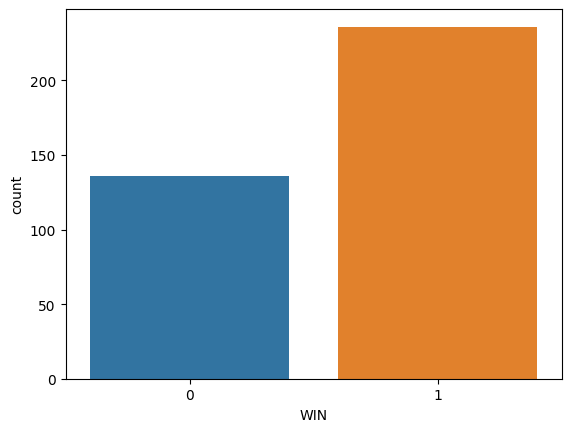

In [7]:
sns.countplot(x = 'WIN', data = data_r1)
plt.show()

In [8]:
print("Proportion of wins: " + str(len(data_r1[data_r1["WIN"] == 1])/len(data_r1)) + "\n" + \
     "Proportion of losses: " + str(len(data_r1[data_r1["WIN"] == 0])/len(data_r1)))

Proportion of wins: 0.6344086021505376
Proportion of losses: 0.3655913978494624


## 4. Multivariate analysis

### 4.1. Categorical vs. numerical

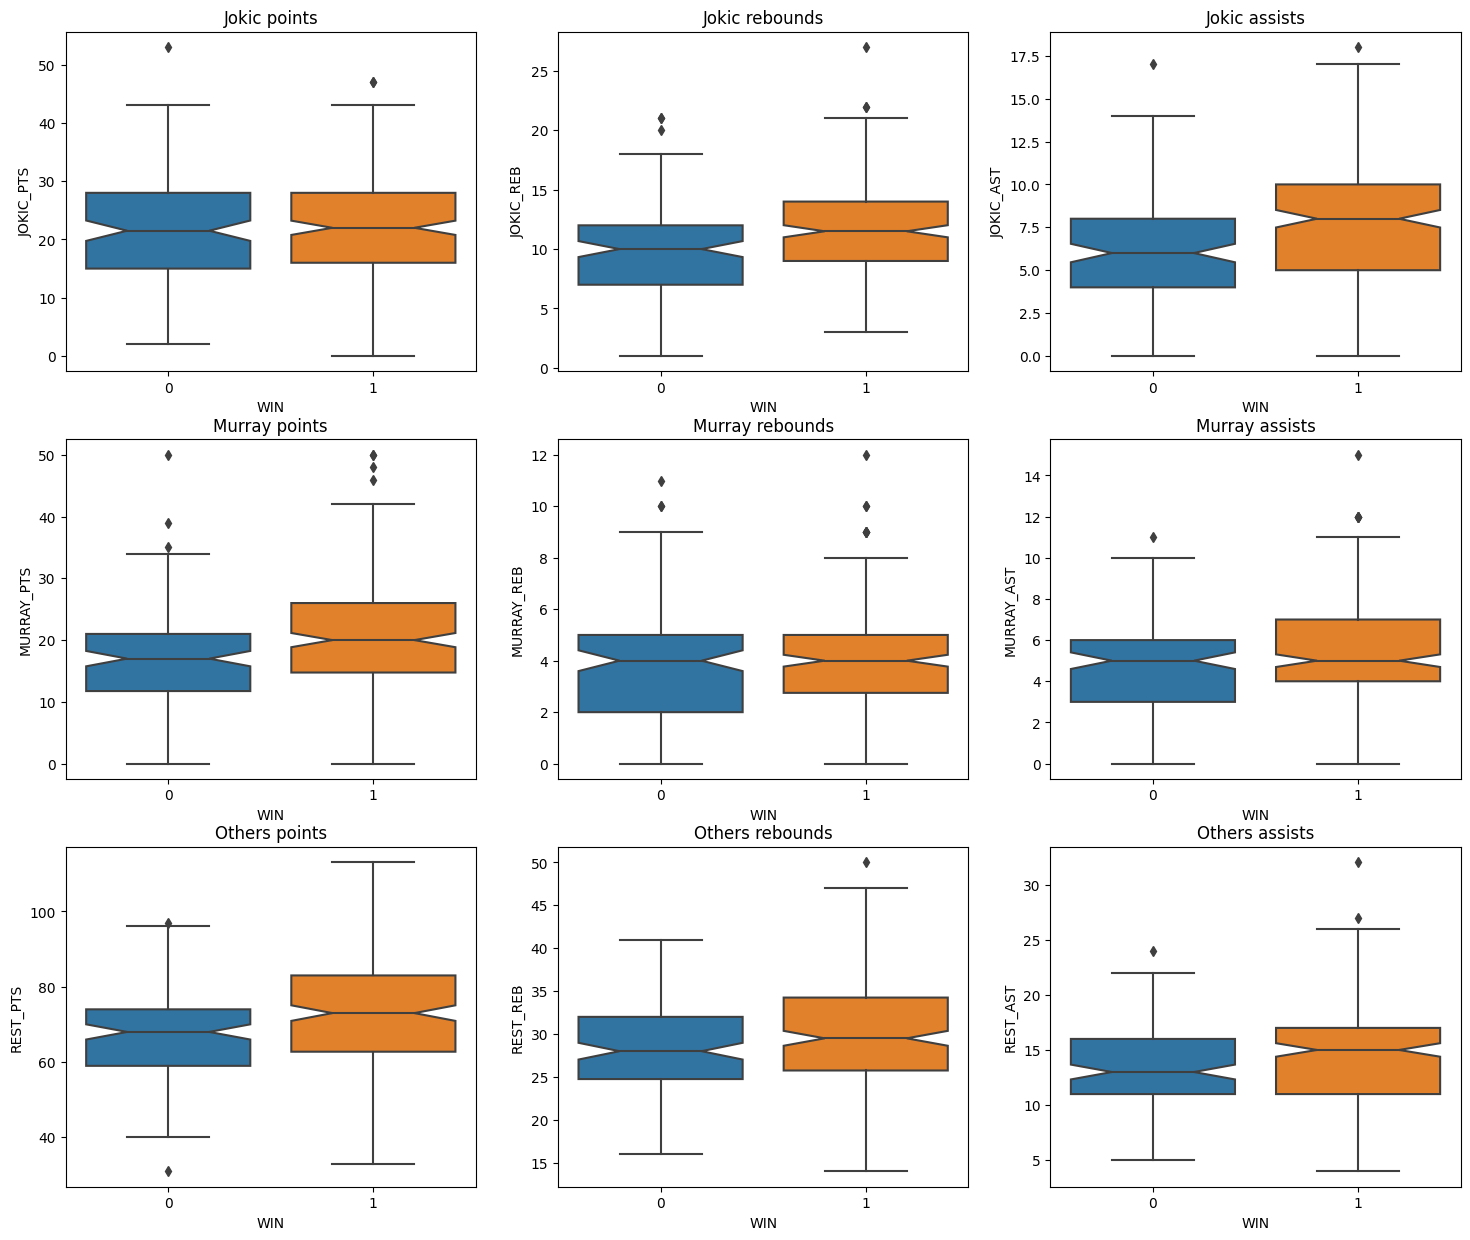

In [9]:
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (18, 15))
sns.boxplot(x = 'WIN', y = 'JOKIC_PTS', data = data_r1, ax = ax[0, 0], notch = True)
ax[0, 0].set_title('Jokic points')

sns.boxplot(x = 'WIN', y = 'JOKIC_REB', data = data_r1, ax = ax[0, 1], notch = True)
ax[0, 1].set_title('Jokic rebounds')

sns.boxplot(x = 'WIN', y = 'JOKIC_AST', data = data_r1, ax = ax[0, 2], notch = True)
ax[0, 2].set_title('Jokic assists')

sns.boxplot(x = 'WIN', y = 'MURRAY_PTS', data = data_r1, ax = ax[1, 0], notch = True)
ax[1, 0].set_title('Murray points')

sns.boxplot(x = 'WIN', y = 'MURRAY_REB', data = data_r1, ax = ax[1, 1], notch = True)
ax[1, 1].set_title('Murray rebounds')

sns.boxplot(x = 'WIN', y = 'MURRAY_AST', data = data_r1, ax = ax[1, 2], notch = True)
ax[1, 2].set_title('Murray assists')

sns.boxplot(x = 'WIN', y = 'REST_PTS', data = data_r1, ax = ax[2, 0], notch = True)
ax[2, 0].set_title('Others points')

sns.boxplot(x = 'WIN', y = 'REST_REB', data = data_r1, ax = ax[2, 1], notch = True)
ax[2, 1].set_title('Others rebounds')

sns.boxplot(x = 'WIN', y = 'REST_AST', data = data_r1, ax = ax[2, 2], notch = True)
ax[2, 2].set_title('Others assists')
plt.show()

Installing SHAP (and dependencies) requires numpy v1.24, which doesn't work with the latest version of seaborn, v0.12.2. Downgrading Seaborn to v0.12.1 causes issues with the pairplots.

OptionError: No such keys(s): 'mode.use_inf_as_null'

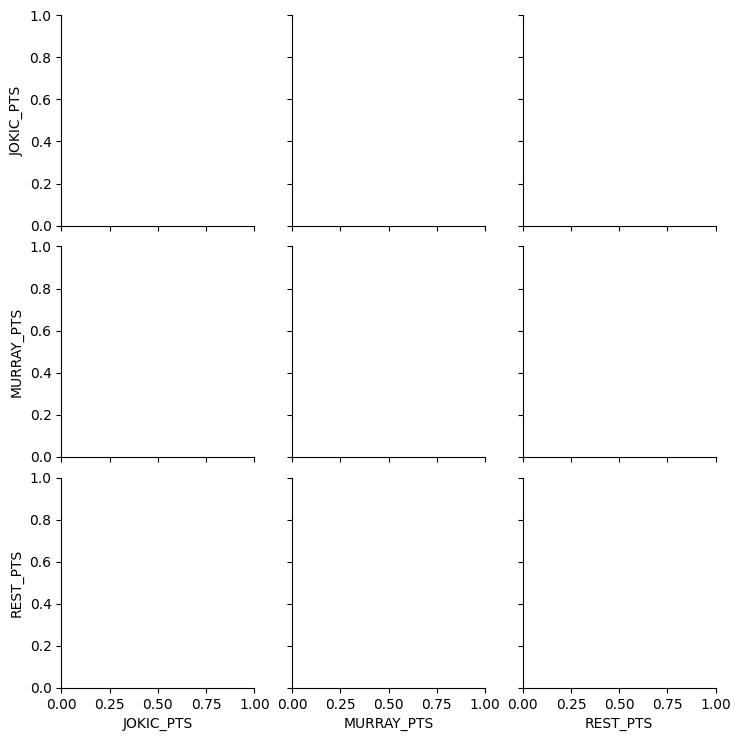

In [10]:
sns.pairplot(vars = ['JOKIC_PTS', 'MURRAY_PTS', 'REST_PTS'], hue = 'WIN', data = data_r1)
plt.show()

In [ ]:
sns.pairplot(vars = ['JOKIC_REB', 'MURRAY_REB', 'REST_REB'], hue = 'WIN', data = data_r1)
plt.show()

In [ ]:
sns.pairplot(vars = ['JOKIC_AST', 'MURRAY_AST', 'REST_AST'], hue = 'WIN', data = data_r1)
plt.show()

In [ ]:
sns.pairplot(vars = ['JOKIC_AST', 'MURRAY_PTS'], hue = 'WIN', data = data_r1)
plt.show()

In [ ]:
sns.pairplot(vars = ['JOKIC_PTS', 'MURRAY_AST'], hue = 'WIN', data = data_r1)
plt.show()

### 4.2. Numerical vs. numerical

In [ ]:
sns.pairplot(vars = data_r1.columns.to_list()[1:], hue = 'WIN', data = data_r1)
plt.show()

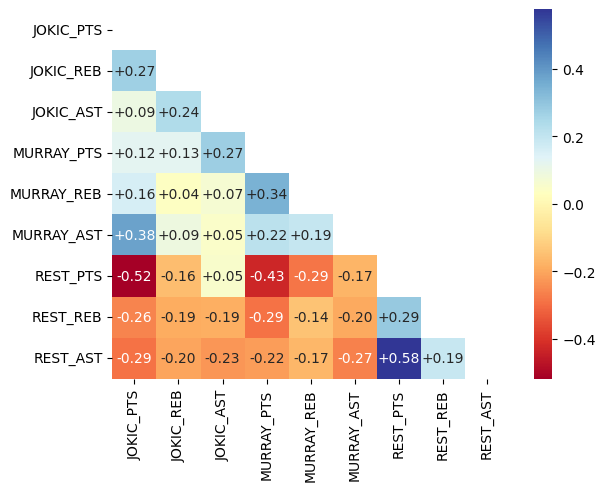

In [11]:
correlations = data_r1.iloc[:,1:].corr()

# Mask the upper half for visualization purposes
mask = np.zeros_like(correlations, dtype = np.bool_)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(correlations, mask = mask, cmap = "RdYlBu",
            annot = True, fmt = "+.2f")
plt.show()

### 4.3. Numerical variable discretization

Let's take as an example $JOKIC\_AST$. We'll discretize it to study the probability of the Nuggets winning as Jokic's assists increase.

In [12]:
# The starting point is the use of the pandas method 'cut'. We'll discretize Jokic's assists in five bins. Let's check
# how the process is done
results, bin_edges = pd.cut(data_r1["JOKIC_AST"], bins = np.linspace(data_r1["JOKIC_AST"].min(), \
    data_r1["JOKIC_AST"].max(), 6), retbins = True, include_lowest = True, labels = None)
results

0         (3.6, 7.2]
1      (-0.001, 3.6]
2        (7.2, 10.8]
3         (3.6, 7.2]
4         (3.6, 7.2]
           ...      
367     (10.8, 14.4]
368       (3.6, 7.2]
369      (7.2, 10.8]
370       (3.6, 7.2]
371       (3.6, 7.2]
Name: JOKIC_AST, Length: 372, dtype: category
Categories (5, interval[float64, right]): [(-0.001, 3.6] < (3.6, 7.2] < (7.2, 10.8] < (10.8, 14.4] < (14.4, 18.0]]

In [13]:
# This code extracts only the bin edges, which we'll use later as the category labels
bin_edges = pd.cut(data_r1["JOKIC_AST"], bins = np.linspace(data_r1["JOKIC_AST"].min(), \
    data_r1["JOKIC_AST"].max(), 6), retbins = True, include_lowest = True, labels = None)[1]
bin_edges

array([ 0. ,  3.6,  7.2, 10.8, 14.4, 18. ])

In [14]:
# We'll assign the labels extracted previously to the results of the discretization. Note the argument 'retbins'
# is no longer used and the argument 'labels' takes the 'bin_edges' extracted above
results = pd.cut(data_r1["JOKIC_AST"], bins = np.linspace(data_r1["JOKIC_AST"].min(), \
    data_r1["JOKIC_AST"].max(), 6), include_lowest = True, labels = bin_edges.tolist()[1:6])
results

0       7.2
1       3.6
2      10.8
3       7.2
4       7.2
       ... 
367    14.4
368     7.2
369    10.8
370     7.2
371     7.2
Name: JOKIC_AST, Length: 372, dtype: category
Categories (5, float64): [3.6 < 7.2 < 10.8 < 14.4 < 18.0]

In [15]:
# We'll convert these results into a DataFrame and append to it the column 'WIN'
results = results.to_frame().rename(columns = {"JOKIC_AST": "JOKIC_AST_disc"})
results = pd.concat([results, data_r1['WIN']], axis = 1)
results.head(2)

,JOKIC_AST_disc,WIN
0,7.2,1
1,3.6,0


In [16]:
# Since 'WIN = 1' is a win, a simple average over 'WIN' will tell us the average probability of winning
jokic_ast_bars = results[["JOKIC_AST_disc", "WIN"]].groupby("JOKIC_AST_disc").mean().reset_index().\
    rename(columns = {"WIN": "WIN_prob"})
jokic_ast_bars

,JOKIC_AST_disc,WIN_prob
0,3.6,0.405405
1,7.2,0.570513
2,10.8,0.693694
3,14.4,0.789474
4,18.0,0.909091


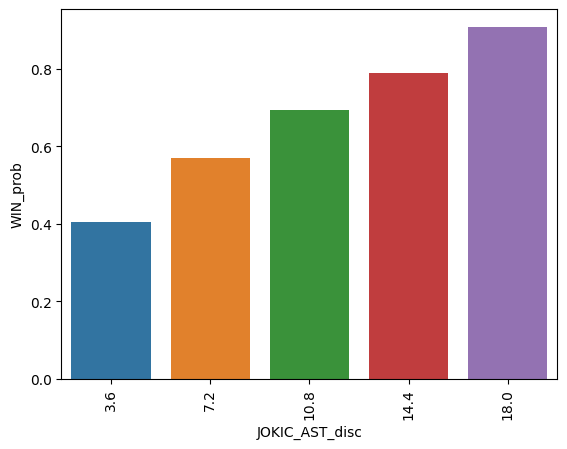

In [17]:
# Let's visually check the results
sns.barplot(x = "JOKIC_AST_disc", y = "WIN_prob", data = jokic_ast_bars)
plt.xticks(rotation = 90)
plt.show()

Let's convert this process into a function.

In [18]:
def discretize(stats_ser: pd.Series, win_col: pd.Series, bins_qty: int):
    """
    
    """

    bin_edges = pd.cut(stats_ser, bins = np.linspace(stats_ser.min(), stats_ser.max(), bins_qty + 1), \
                       retbins = True, include_lowest = True, labels = None)[1]
    results = pd.cut(stats_ser, bins = np.linspace(stats_ser.min(), stats_ser.max(), bins_qty + 1), \
                     include_lowest = True, labels = bin_edges.tolist()[1:bins_qty + 1])
    col_name = results.name + '_disc' 
    results = results.to_frame().rename(columns = {results.name: col_name})
    results = pd.concat([results, win_col], axis = 1)
    stats_bars = results.groupby(col_name).mean().reset_index().rename(columns = {"WIN": "WIN_prob"})
    sns.barplot(x = col_name, y = "WIN_prob", data = stats_bars)
    plt.xticks(rotation = 90)
    plt.show()

Apply the process to $MURRAY\_PTS$.

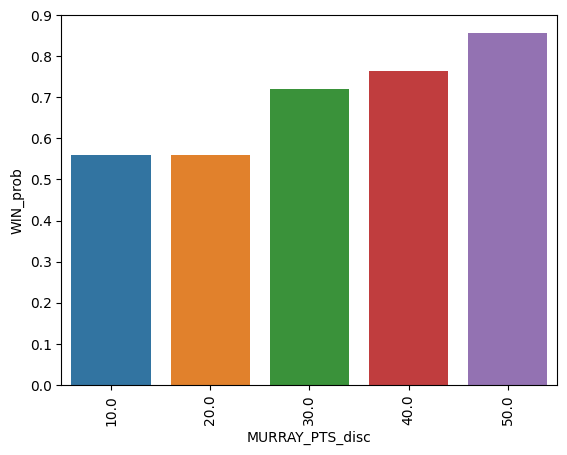

In [19]:
discretize(data_r1["MURRAY_PTS"], data_r1["WIN"], 5)

## Data saving

In [20]:
data_r1['PLAYOFFS'] = data['PLAYOFFS']
data_r1.to_csv('model_data.csv', index = False)